In [1]:
# Import necessary libraries
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Change the directory to the location of the data
os.chdir("/content/drive/My Drive/Poisson_Study/data")

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import radon, rescale


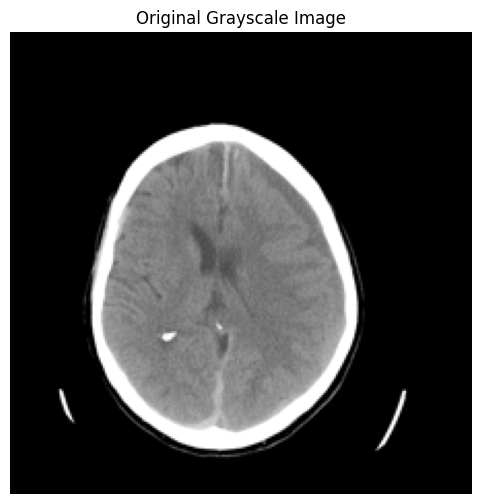

In [3]:
# Load an image
image_path = '/content/drive/MyDrive/Poisson_Study/data/ID_046070162.png'
image = imread(image_path, as_gray=True)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()


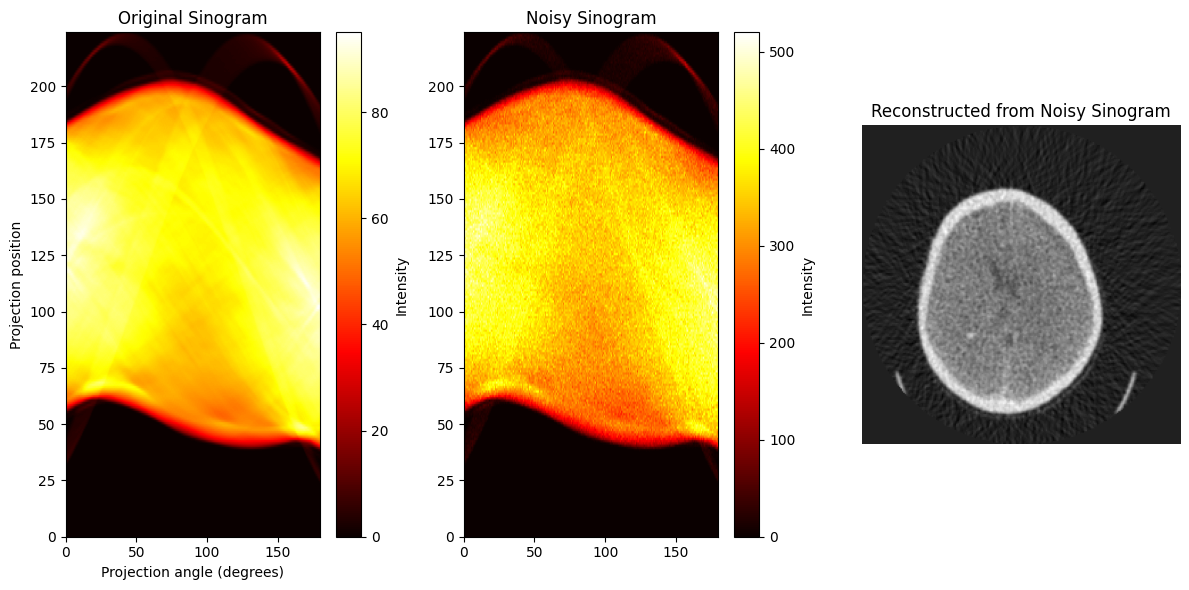

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import radon, iradon, rescale

image_path = '/content/drive/MyDrive/Poisson_Study/data_large/ID_046070162.png'
image = imread(image_path, as_gray=True)  # Load image in grayscale

theta = np.linspace(0., 180., max(image.shape), endpoint=False)

sinogram = radon(image, theta=theta)

scale_factor = 5 # Adjust this factor based on your application
# noisy_sinogram = np.random.poisson(sinogram * scale_factor) / scale_factor
noisy_sinogram = np.random.poisson(sinogram * scale_factor)

reconstruction_fbp_noisy = iradon(noisy_sinogram, theta=theta, filter_name='hamming')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(sinogram, cmap='hot', extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Sinogram')
plt.xlabel('Projection angle (degrees)')
plt.ylabel('Projection position')

plt.subplot(1, 3, 2)
plt.imshow(noisy_sinogram, cmap='hot', extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Noisy Sinogram')

plt.subplot(1, 3, 3)
plt.imshow(reconstruction_fbp_noisy, cmap='gray')
plt.title('Reconstructed from Noisy Sinogram')
plt.axis('off')

plt.tight_layout()
plt.show()


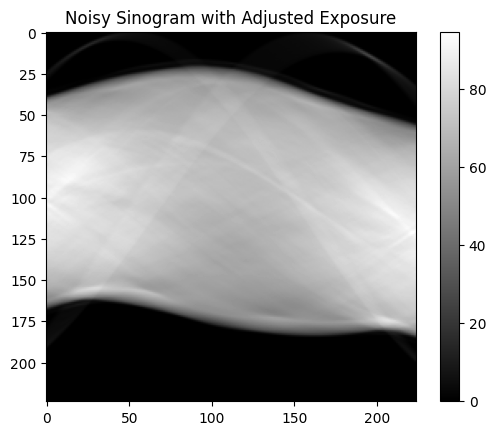

In [10]:
import numpy as np
from skimage.transform import radon
import matplotlib.pyplot as plt


exposure_time = 5.0
base_scale_factor = 1000
adjusted_scale_factor = base_scale_factor * exposure_time

sinogram = radon(image, theta=theta)

noisy_sinogram = np.random.poisson(sinogram * adjusted_scale_factor) / adjusted_scale_factor

plt.imshow(noisy_sinogram, cmap='gray')
plt.title("Noisy Sinogram with Adjusted Exposure")
plt.colorbar()
plt.show()
